In [1]:
import sys

sys.path.append("../")
sys.path.append("../cascade")
sys.path.append("../data_analysis")


from cascade.cascade_driver import CascadeDriver, CascadeEvent
from cascade.particle_event import CascadeParticle

shower = CascadeDriver(CascadeEvent(1e3))

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [3]:
particle = CascadeParticle(2212, 1e8, 0)
shower.run(particle)

Pstack = 199, Fstack = 5068, Iterations = 3000, Decaying = 10429
Pstack = 143, Fstack = 9825, Iterations = 4000, Decaying = 27120
Pstack = 74, Fstack = 14276, Iterations = 5000, Decaying = 43367
Pstack = 73, Fstack = 19064, Iterations = 6000, Decaying = 61168
Pstack = 34, Fstack = 23457, Iterations = 7000, Decaying = 77237
Pstack = 47, Fstack = 27725, Iterations = 8000, Decaying = 93487
Pstack = 96, Fstack = 32114, Iterations = 9000, Decaying = 109673
Pstack = 52, Fstack = 37125, Iterations = 10000, Decaying = 126466
Pstack = 20, Fstack = 41787, Iterations = 11000, Decaying = 142592
Pstack = 503818, Fstack = 43005, Iterations = 12000, Decaying = 0
Pstack = 502818, Fstack = 44005, Iterations = 13000, Decaying = 0
Pstack = 501818, Fstack = 45005, Iterations = 14000, Decaying = 0
Pstack = 500818, Fstack = 46005, Iterations = 15000, Decaying = 0
Pstack = 499818, Fstack = 47005, Iterations = 16000, Decaying = 0
Pstack = 498818, Fstack = 48005, Iterations = 17000, Decaying = 0
Pstack = 49781

In [4]:
from data_analysis import CascadeAnalysis
import importlib
import data_analysis
importlib.reload(data_analysis)

ca = CascadeAnalysis(shower)

ca.print_stats()

Number of final particles = 891590
Number of events = 836784:
 interactions = 10210, decays = 427226


{22: 221541, -14: 151889, 14: 151887, -11: 79178, 11: 78360, 12: 77838, -12: 77020, 2212: 12446, 2112: 10656, 211: 10548, -211: 10534, -2112: 4141, -2212: 3786, 130: 1001, -321: 253, 321: 233, 13: 137, -13: 135, 3122: 3, -3122: 2, 3112: 1, 310: 1}


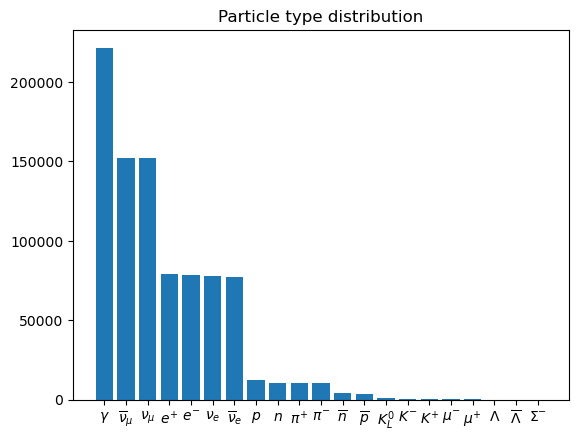

In [11]:
ca.plot_pid(to_=-1)

In [6]:
etot = 0
for i in shower.get_particles():
    etot += i.energy
    
print((etot - 1e8)/1e8, etot)    

0.0011191717764152587 100111917.17764153


In [36]:
ind = 0
for i in shower.get_particles():
    if i.energy < 5 and ind < 10:
        print(i)
        ind += 1

CascadeParticle(pid=2112, energy=0.9455561712384224, xdepth=24.186117421473224, production_mode=1, generation_number=1, final_code=2, xdepth_decay=0, parent=[CascadeParticle(pid=2212, energy=100000000.0, xdepth=0, production_mode=0, generation_number=0, final_code=0, xdepth_decay=0, parent=[])])
CascadeParticle(pid=2112, energy=1.1520946621894836, xdepth=24.186117421473224, production_mode=1, generation_number=1, final_code=2, xdepth_decay=0, parent=[CascadeParticle(pid=2212, energy=100000000.0, xdepth=0, production_mode=0, generation_number=0, final_code=0, xdepth_decay=0, parent=[])])
CascadeParticle(pid=2112, energy=2.4846059796982445, xdepth=159.27838011092976, production_mode=1, generation_number=2, final_code=2, xdepth_decay=0, parent=[CascadeParticle(pid=130, energy=2727209.2625494953, xdepth=24.186117421473224, production_mode=1, generation_number=1, final_code=0, xdepth_decay=0, parent=[CascadeParticle(pid=2212, energy=100000000.0, xdepth=0, production_mode=0, generation_numbe

Min = 0.00 km, Max = 14.06 km


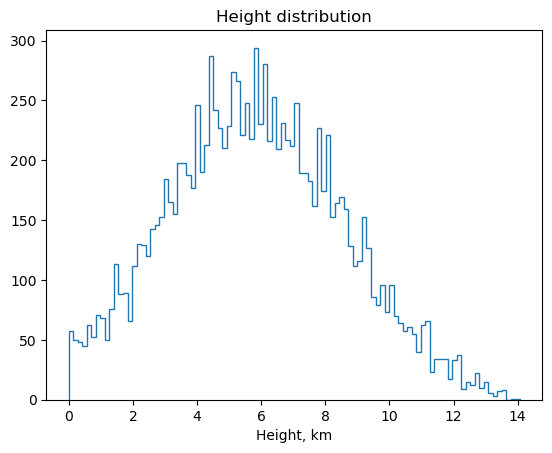

In [7]:
ca.plot_height(2212)

[]

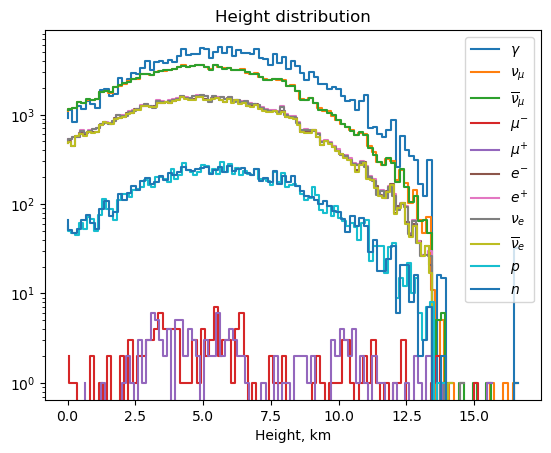

In [12]:
import matplotlib.pyplot as plt
ca.plot_height_list(pids = [22,14, -14, 13, -13, 11, -11, 12, -12, 2212, 2112], all_pids = False)
plt.semilogy()

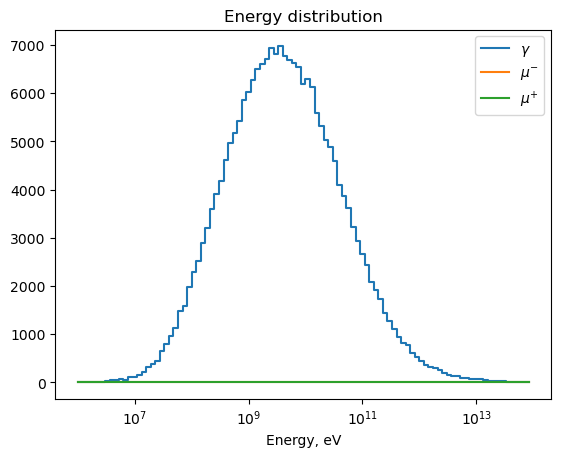

In [15]:
ca.plot_energy_list(pids = [13, -13],
                    all_pids = False, xrange = (1e6, 1e14), nbins = 100)

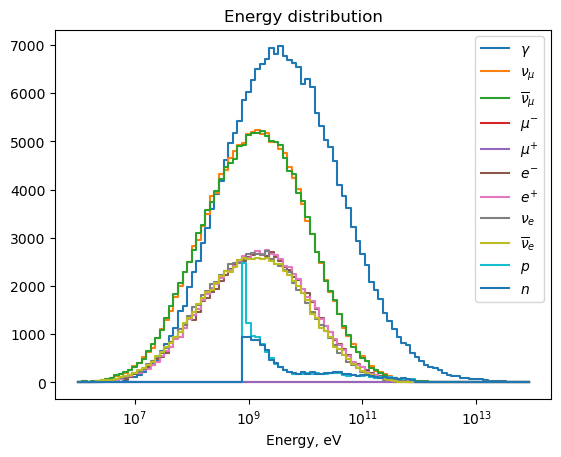

In [13]:
ca.plot_energy_list(pids = [22,14, -14, 13, -13, 11, -11, 12, -12, 2212, 2112],
                    all_pids = False, xrange = (1e6, 1e14), nbins = 100)

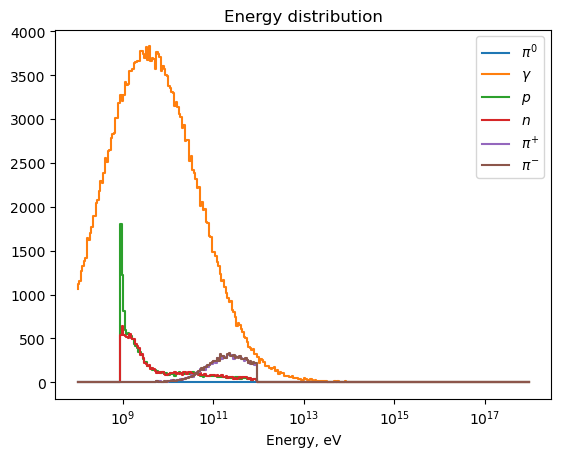

In [9]:
ca.plot_energy_list(pids = [111,22,2212, 2112, 211, -211],
                    all_pids = False, xrange = (1e8, 1e18), nbins = 300)

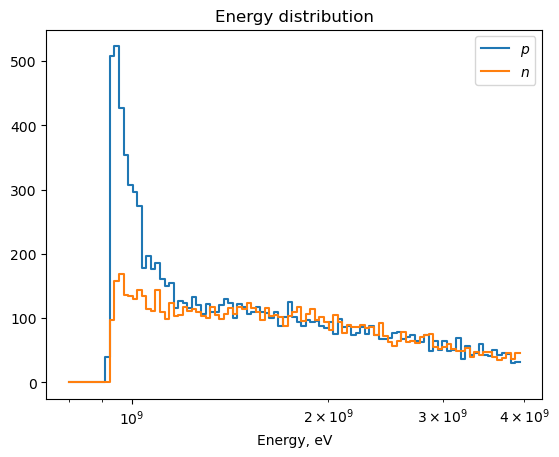

In [15]:
ca.plot_energy_list(pids = [2212, 2112],
                    all_pids = False, xrange = (8e8, 4e9), nbins = 100)

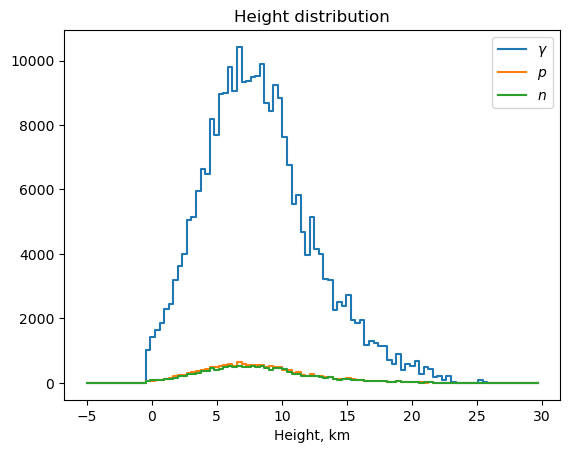

In [25]:
ca.plot_height_list(pids = [22, 2212, 2112],
                    all_pids = False, xrange = (-5, 30),
                    energy_range = (1e8, 1e13),
                    nbins = 100)

In [ ]:
# import importlib
# import cascade.particle_event
# importlib.reload(cascade.particle_event)
# from cascade.particle_event import CascadeParticle


pt = shower.get_particles()



for p in pt:
    if p.generation_number > 5:
        print(p.get_parents())
        break